# **Prediction of Telecom Customer Churn**
 **Santosh Saranyan**

 Source for the dataset: https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-gc1 


## Introduction
Customers in the telecom industry have the option to choose from a large variety of services providers and often switch from one service provider to another. In this context, a model is built that will be able to predict which customers are the most likely to switch providers (also known as churn) in order to make sure that the appropriate effort can be put into retaining them. The key features that cause customers to switch are identified as well.

Visualization of Classes in the dataset: (made with Tableau)

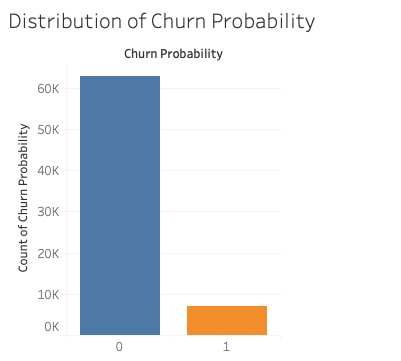



Visualization of one of the columns:

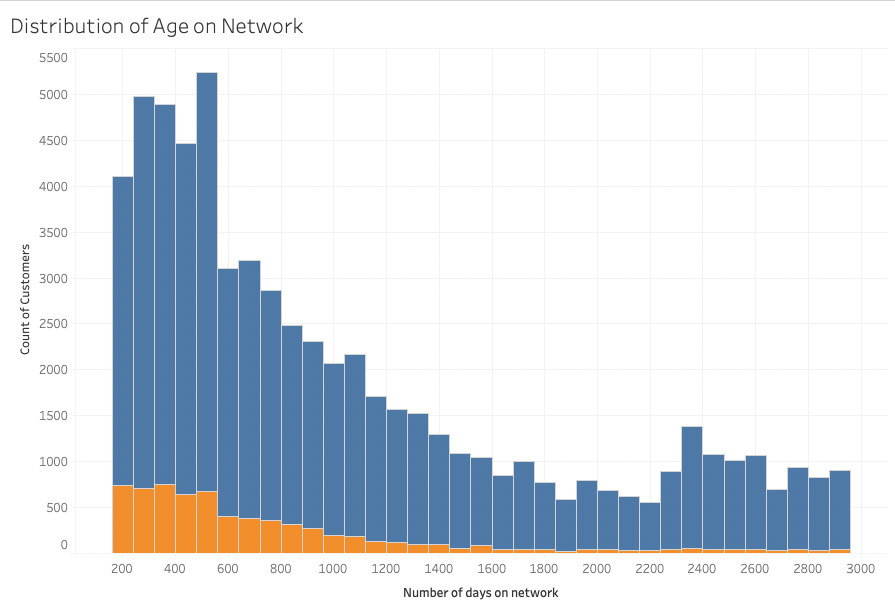

In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# To ensure all outputs from a cell are shown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To ensure all columns of a dataframe are shown
pd.set_option("display.max_columns", None)

In [ ]:
# Reading in the data
raw_data= pd.read_csv("train.csv")
raw_data.shape
raw_data.head()

(69999, 172)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

## Data Analysis
The dataset contains around 70,000 rows and 172 features, such as Days on Network, Total Outgoing minutes of Voice Call, Roaming Outgoing Minutes of Voice Call, Recharge Amount and so on.
These columns were a combination of 36 Key definitions. For example, the column named “total_og_mou_6”, consists of the key definitions “og”, “mou” and “6”. This denotes that the column refers to “the total outgoing minutes of voice call made by the customer in the month of June”.

In [ ]:
raw_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [ ]:
# Check for columns with missing values
pd.set_option("display.max_rows", None)
raw_data.isna().sum()
pd.set_option("display.max_rows", 10)

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [ ]:
for column_name in raw_data.columns:
    column = raw_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  id  is :  1
Count of zeros in column  circle_id  is :  0
Count of zeros in column  loc_og_t2o_mou  is :  69297
Count of zeros in column  std_og_t2o_mou  is :  69297
Count of zeros in column  loc_ic_t2o_mou  is :  69297
Count of zeros in column  last_date_of_month_6  is :  0
Count of zeros in column  last_date_of_month_7  is :  0
Count of zeros in column  last_date_of_month_8  is :  0
Count of zeros in column  arpu_6  is :  2603
Count of zeros in column  arpu_7  is :  2666
Count of zeros in column  arpu_8  is :  3898
Count of zeros in column  onnet_mou_6  is :  6201
Count of zeros in column  onnet_mou_7  is :  6440
Count of zeros in column  onnet_mou_8  is :  6631
Count of zeros in column  offnet_mou_6  is :  2570
Count of zeros in column  offnet_mou_7  is :  2647
Count of zeros in column  offnet_mou_8  is :  2961
Count of zeros in column  roam_ic_mou_6  is :  53656
Count of zeros in column  roam_ic_mou_7  is :  56939
Count of zeros in column  roam_ic_mou_8  is

## Data Preprocessing

A lot of columns in the dataset had many missing values, were full of zeros, or had the same value throughout the column. These columns were removed with a threshold of 50% for missing values and 60% for zeros. The date and id columns were dropped as well.

In [ ]:
nunique = raw_data.nunique()
cols_to_drop = nunique[nunique == 1].index
data = raw_data.drop(cols_to_drop, axis =1)

# Drop all columns that have more than 50% of missing values
data = data.dropna(thresh=int(data.shape[0] * 0.5), axis = 1)

for column_name in data.columns:
    column = data[column_name]
    # Get the count of zeros in column 
    count = (column == 0).sum()
    # Drop all columns that have more than 60% of zeros
    if count >= (data.shape[0] * 0.6) and column_name != 'churn_probability':
        data = data.drop([column_name], axis =1)
    
    if 'date' in column_name:
        data = data.drop([column_name], axis =1)

data = data.drop(['id'], axis =1)

print(data.shape)

(69999, 74)


## Outlier Removal
Removing outliers more than 3 standard deviations from the mean of each column

In [ ]:
# Removing outliers
data = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [ ]:
print(data.shape)
data.describe()

(46977, 74)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability
count,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000,46977.000000
mean,208.794060,204.232770,207.792919,75.069295,74.113468,73.966534,126.833749,124.267879,123.879713,28.843234,28.033734,27.988795,67.450048,65.965061,66.105650,2.088360,2.107939,2.010189,98.388660,96.113786,96.111555,42.126265,43.197653,43.363603,47.679544,48.738242,48.448087,90.662543,92.715006,92.597145,2.493957,3.178792,3.196647,192.115616,192.253674,192.166455,32.221625,31.786418,31.465950,81.502198,81.066742,82.145731,7.093644,7.266884,6.866361,120.826034,120.128753,120.486711,4.949940,5.076255,5.029709,12.068563,12.574474,12.154217,18.479281,19.140937,18.650475,144.458155,144.911131,144.819606,6.439066,6.691487,6.284203,240.460247,235.656342,241.726292,88.294485,87.989548,92.413394,54.059369,49.472721,52.931371,1260.175235,0.060221
std,169.528677,167.060497,172.592354,126.921665,128.131134,129.547520,147.532477,147.458958,148.877528,50.754295,49.393017,49.329052,85.982514,83.702428,84.147226,5.091621,5.134547,4.942678,118.773577,115.886451,116.697464,112.806548,115.330918,117.414566,112.568243,114.513202,116.379396,178.240187,181.545920,184.900655,6.088925,7.515266,7.187761,213.974797,216.962164,220.030766,51.009400,49.877412,49.022821,92.228487,89.606405,91.524156,15.536783,16.090676,14.956923,125.486759,122.320868,123.352901,14.015094,14.567030,14.582252,26.691327,27.456908,26.583845,34.869805,35.900155,35.110799,140.152173,137.833435,138.664341,4.609268,4.658126,4.849753,204.724989,203.583271,210.196469,68.459765,69.812172,74.505781,60.623479,60.288625,65.847541,956.435110,0.237898
min,-83.735000,-98.312000,-50.243000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Before imputing, normalizing or class balancing, the dataset is split into train and test sets. No validation set is created as k-fold cross validation is used with the training set

In [ ]:
data_train, data_test, data_train_label, data_test_label = train_test_split(data.drop(["churn_probability"], axis =1), data["churn_probability"], test_size=0.2, random_state=7)


## Missing Value Imputation
The missing values are imputed with a simple imputer with the method as median

In [ ]:
# Impute missing values with simple imputer, method is median
# On Training
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_train)
impute_data_train = pd.DataFrame(imp_median.transform(data_train))
impute_data_train.columns= data_train.columns

# On Test
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_test)
impute_data_test = pd.DataFrame(imp_median.transform(data_test))
impute_data_test.columns = data_test.columns

SimpleImputer(strategy='median')

SimpleImputer(strategy='median')

## Class Balancing
As the classes of the dataset are imbalanced, SMOTE for Oversampling followed by Random Undersampling is used.


In [ ]:
# Synthetic Minority Oversampling Technique (SMOTE) - Class Balancing
oversample = SMOTE(sampling_strategy=0.4)
over_data_train, over_data_train_label = oversample.fit_resample(impute_data_train, data_train_label)

print("Before Balancing: ")
print(Counter(data_train_label))

print("After Oversampling: ")
print(Counter(over_data_train_label))

undersample = RandomUnderSampler(sampling_strategy=0.5)
balanced_data_train, balanced_data_train_label = undersample.fit_resample(over_data_train, over_data_train_label)

print("After Undersampling: ")
print(Counter(balanced_data_train_label))

Before Balancing: 
Counter({0: 35308, 1: 2273})
After Oversampling: 
Counter({0: 35308, 1: 14123})
After Undersampling: 
Counter({0: 28246, 1: 14123})


## Feature Normalization
The features are normalized using a Min Max Scaler

In [ ]:
# Feature Normalization

# On Training
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(balanced_data_train)
scaled_data_train = pd.DataFrame(scaled_data, columns=balanced_data_train.columns)

# On Testing
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(impute_data_test)
scaled_data_test = pd.DataFrame(scaled_data, columns=impute_data_test.columns)

## Feature Selection
The features are selected using the RFE Method along with cross validation

In [ ]:
# Using Recursive Feature Eliminator to select features
X=scaled_data_train
y=balanced_data_train_label
rfe = RFECV(estimator=DecisionTreeClassifier(), scoring='f1', n_jobs=-1)
rfe.fit(X, y)

RFECV(estimator=DecisionTreeClassifier(), n_jobs=-1, scoring='f1')

In [ ]:
X_train = scaled_data_train.iloc[:, rfe.support_]
y_train = balanced_data_train_label

X_test = scaled_data_test.iloc[:, rfe.support_]
y_test = data_test_label

## Hyper Parameter Tuning
The hyperparameters for the model used (Random Forest Model) are tuned using the randomized search method

In [ ]:
# Hyperparameter Tuning for Random Forest Regressor


# Hyperparameters:
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 1000, num = 10)]

max_features =['sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2,5,10]

min_samples_leaf = [1, 2, 4]

param_grid = {"n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth, 
              "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}

In [ ]:
# Defining the model
RF_hyp = RandomForestClassifier(class_weight="balanced")

# Hyperparameter tuning using randomizedsearch
modelRF_hyp = RandomizedSearchCV(estimator=RF_hyp, param_distributions=param_grid, n_iter=15, cv=3, verbose=100, random_state=7, n_jobs=-1, scoring='f1')

# Fitting the model
modelRF_hyp.fit(X_train, y_train)

# Getting the best parameters
modelRF_hyp.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=7, scoring='f1', verbose=100)

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

## Model Training

The model used for selection is the Random Forest Model. The Random Forest Classifier is an ensemble method. It consists of many Decision Tree classifiers. Each Decision Tree in the ensemble gives a prediction, the class with the most votes is taken as the Random Forest model’s prediction.
Random Forest requires the individual trees to be as relatively distinct as possible (low correlation). This way, the individual trees protect themselves from their individual errors. This leads to accurate predictions of the ensemble.
This independence is achieved by using two techniques:
- Bagging
- Random Vector Method

Bagging or Bootstrap Aggregation refers to choosing repeated bootstrap samples from the dataset for training each individual tree. Bootstrap sampling refers to drawing N samples at random from a dataset of size N with replacement. Each training point is sampled with a probability of 1/n.

The random vector method refers to choosing at each node of a decision tree, “m” random features instead of all, to make the best split. m = sqrt(p), where p is the total number of features.

The algorithm for the Random Forest Classifier is given as follows:

```
for b = 1 to B:

    Draw bootstrap sample S of size N from training data D

    Grow a tree Tb to the bootstrap data, by repeating the following:

    for each terminal node of the tree:

        Select m variables at random from all p variables

        Pick the best split among the m

        Split the node into two 
        
Output the ensemble of trees {Tb}B

Classify: CB (x) = majority vote {Cb (x)}B
```



In [ ]:
# Creating the model
modelRF = RandomForestClassifier(n_estimators=800, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',random_state=7, class_weight="balanced")

# Fitting the model
modelRF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='sqrt', n_estimators=800, random_state=7)

In [ ]:
# Predicting Values for the training set
predsRFTrain = modelRF.predict(X_train)
print("Training Confusion Matrix: \n")
confusion_matrix(y_train, predsRFTrain)
print("\n\nTraining Accuracy:")
accuracy_score(y_train, predsRFTrain)
print("\n\nClassification Report: \n")
print(classification_report(y_train, predsRFTrain))

# Predicting the values for Test set
predsRF = modelRF.predict(X_test)

# Test error
print("\nTest Confusion Matrix:\n")
confusion_matrix(y_test, predsRF)
# Test error
print("\n\nTest Accuracy:")
accuracy_score(y_test, predsRF)

print("\n\nClassification Report: \n")
print(classification_report(y_test, predsRF))

Training Confusion Matrix: 



array([[27853,   393],
       [    0, 14123]])



Training Accuracy:


0.9907243503504921



Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28246
           1       0.97      1.00      0.99     14123

    accuracy                           0.99     42369
   macro avg       0.99      0.99      0.99     42369
weighted avg       0.99      0.99      0.99     42369


Test Confusion Matrix:



array([[8563,  277],
       [ 288,  268]])



Test Accuracy:


0.9398680289484888



Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8840
           1       0.49      0.48      0.49       556

    accuracy                           0.94      9396
   macro avg       0.73      0.73      0.73      9396
weighted avg       0.94      0.94      0.94      9396



## Feature Importance
Visualizing the top 5 most important features for the model

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1abb1295e0>,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=20,
                                                    max_features='sqrt',
                                                    n_estimators=800,
                                                    random_state=7),
                   topn=5)

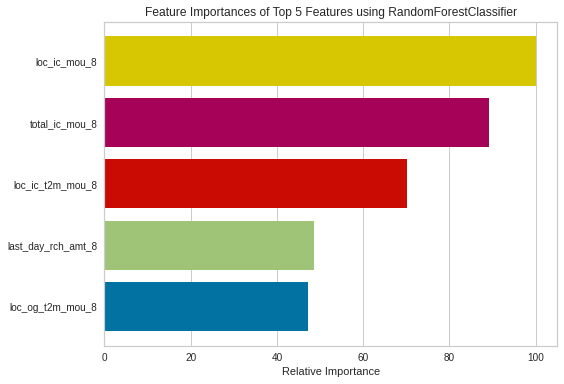

In [ ]:
important_features = FeatureImportances(modelRF, topn=5)
important_features.fit(X_train, y_train)
important_features.xlabel = "Relative Importance"
important_features.show()

Distribution of the top 2 most important features on the original dataset:

loc_ic_mou_8 (Minutes of usage for local incoming calls for Month 8):

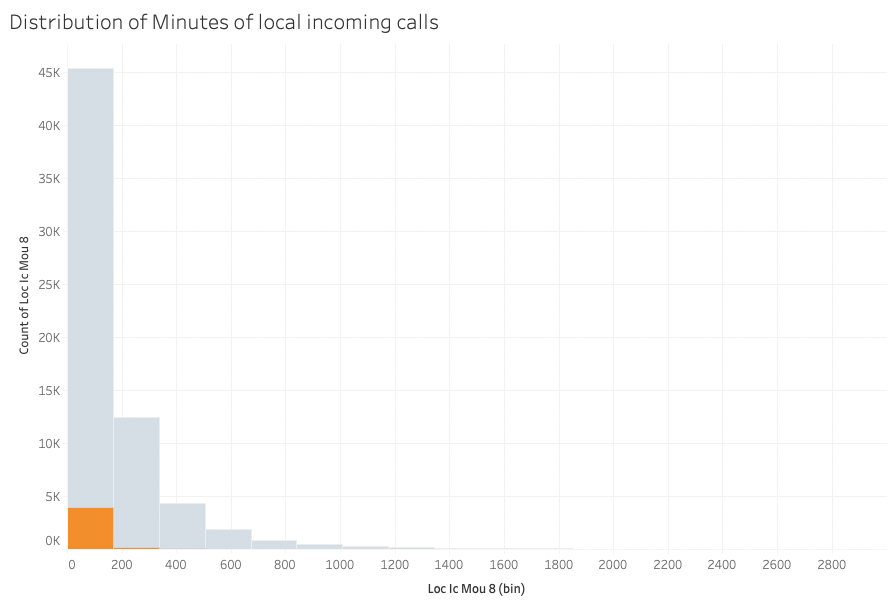




total_ic_mou_8 (Minutes of usage of all incoming calls):
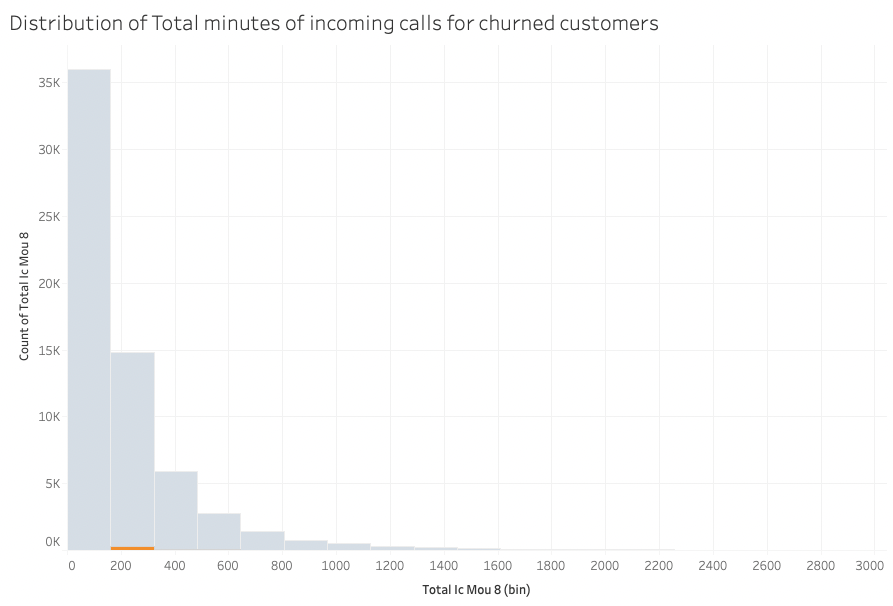